In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\amits\Downloads\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# observation

You can clearly see columns Glucose, BloodPressure, SkinThickness, Insulin, BMI have min..value 0 but it can't be 0

In [6]:
mean=df['Glucose'].mean()
mean
df['Glucose']=df['Glucose'].replace(0,mean)

In [7]:
median=df['SkinThickness'].median()
median

23.0

In [8]:
df['SkinThickness'].replace(0, median,inplace=True)

In [9]:
med=df['BMI'].median()
med

32.0

In [10]:
df['BMI'].replace(0,med, inplace=True)

# Now we are checking if there is any null values?

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: ylabel='Insulin'>

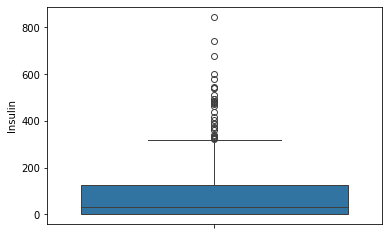

In [12]:
sns.boxplot(df['Insulin'])

# Observation

---You can see this column has outliers

In [13]:
df['Insulin'].skew()

2.272250858431574

In [14]:
# sns.kdeplot(df['Insulin'])

In [15]:
q1=df['Insulin'].quantile(0.25)

In [16]:
q3=df['Insulin'].quantile(0.75)

In [17]:
iqr=q3-q1
iqr

127.25

In [18]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [19]:
print(upper_limit,lower_limit)

318.125 -190.875


In [20]:
df=df.copy()

In [21]:
# new_df['Insulin']=np.where(new_df['Insulin'] > upper_limit, upper_limit, np.where(new_df['Insulin'] < lower_limit, lower_limit, new_df['Insulin'])

In [22]:
# q1=df['Insulin'].quantile(0.25)
# q3=df['Insulin'].quantile(0.75)
# iqr=q3-q1
# iqr
# lower_limit=q1-1.5*iqr
# upper_limit=q3+1.5*iqr
# new_df=df.copy()
df['Insulin'] = np.where (
    df['Insulin'] > upper_limit, upper_limit,
    np.where(df['Insulin'] < lower_limit, lower_limit,
            df['Insulin'])
)

<Axes: ylabel='Insulin'>

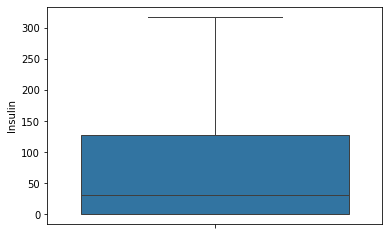

In [23]:
sns.boxplot(df['Insulin'])

In [24]:
mean=df['Insulin'].mean()
mean

73.65266927083333

In [25]:
df['Insulin']=df['Insulin'].replace(0,mean)

In [26]:
df['Insulin'].skew()

1.7630558519520658

<Axes: ylabel='BloodPressure'>

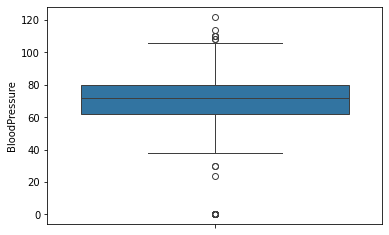

In [27]:
sns.boxplot(df['BloodPressure'])

In [28]:
q1=df['BloodPressure'].quantile(0.25)
q3=df['BloodPressure'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print(lower_limit, upper_limit)
df=df.copy()
df['BloodPressure']=np.where(df['BloodPressure'] > upper_limit,
                                upper_limit,
                                np.where(df['BloodPressure'] < lower_limit,
                                        lower_limit,
                                        df['BloodPressure']))

35.0 107.0


<Axes: ylabel='BloodPressure'>

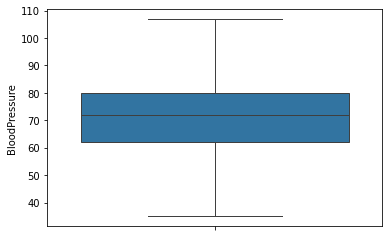

In [29]:
sns.boxplot(df['BloodPressure'])

In [30]:
mean=df["BloodPressure"].mean()
mean
df['BloodPressure']=df['BloodPressure'].replace(0,mean)

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,70.684896,27.334635,109.519985,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,14.197239,9.229014,69.449001,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,35.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,23.000000,73.652669,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,73.652669,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,107.000000,99.000000,318.125000,67.100000,2.420000,81.000000,1.000000


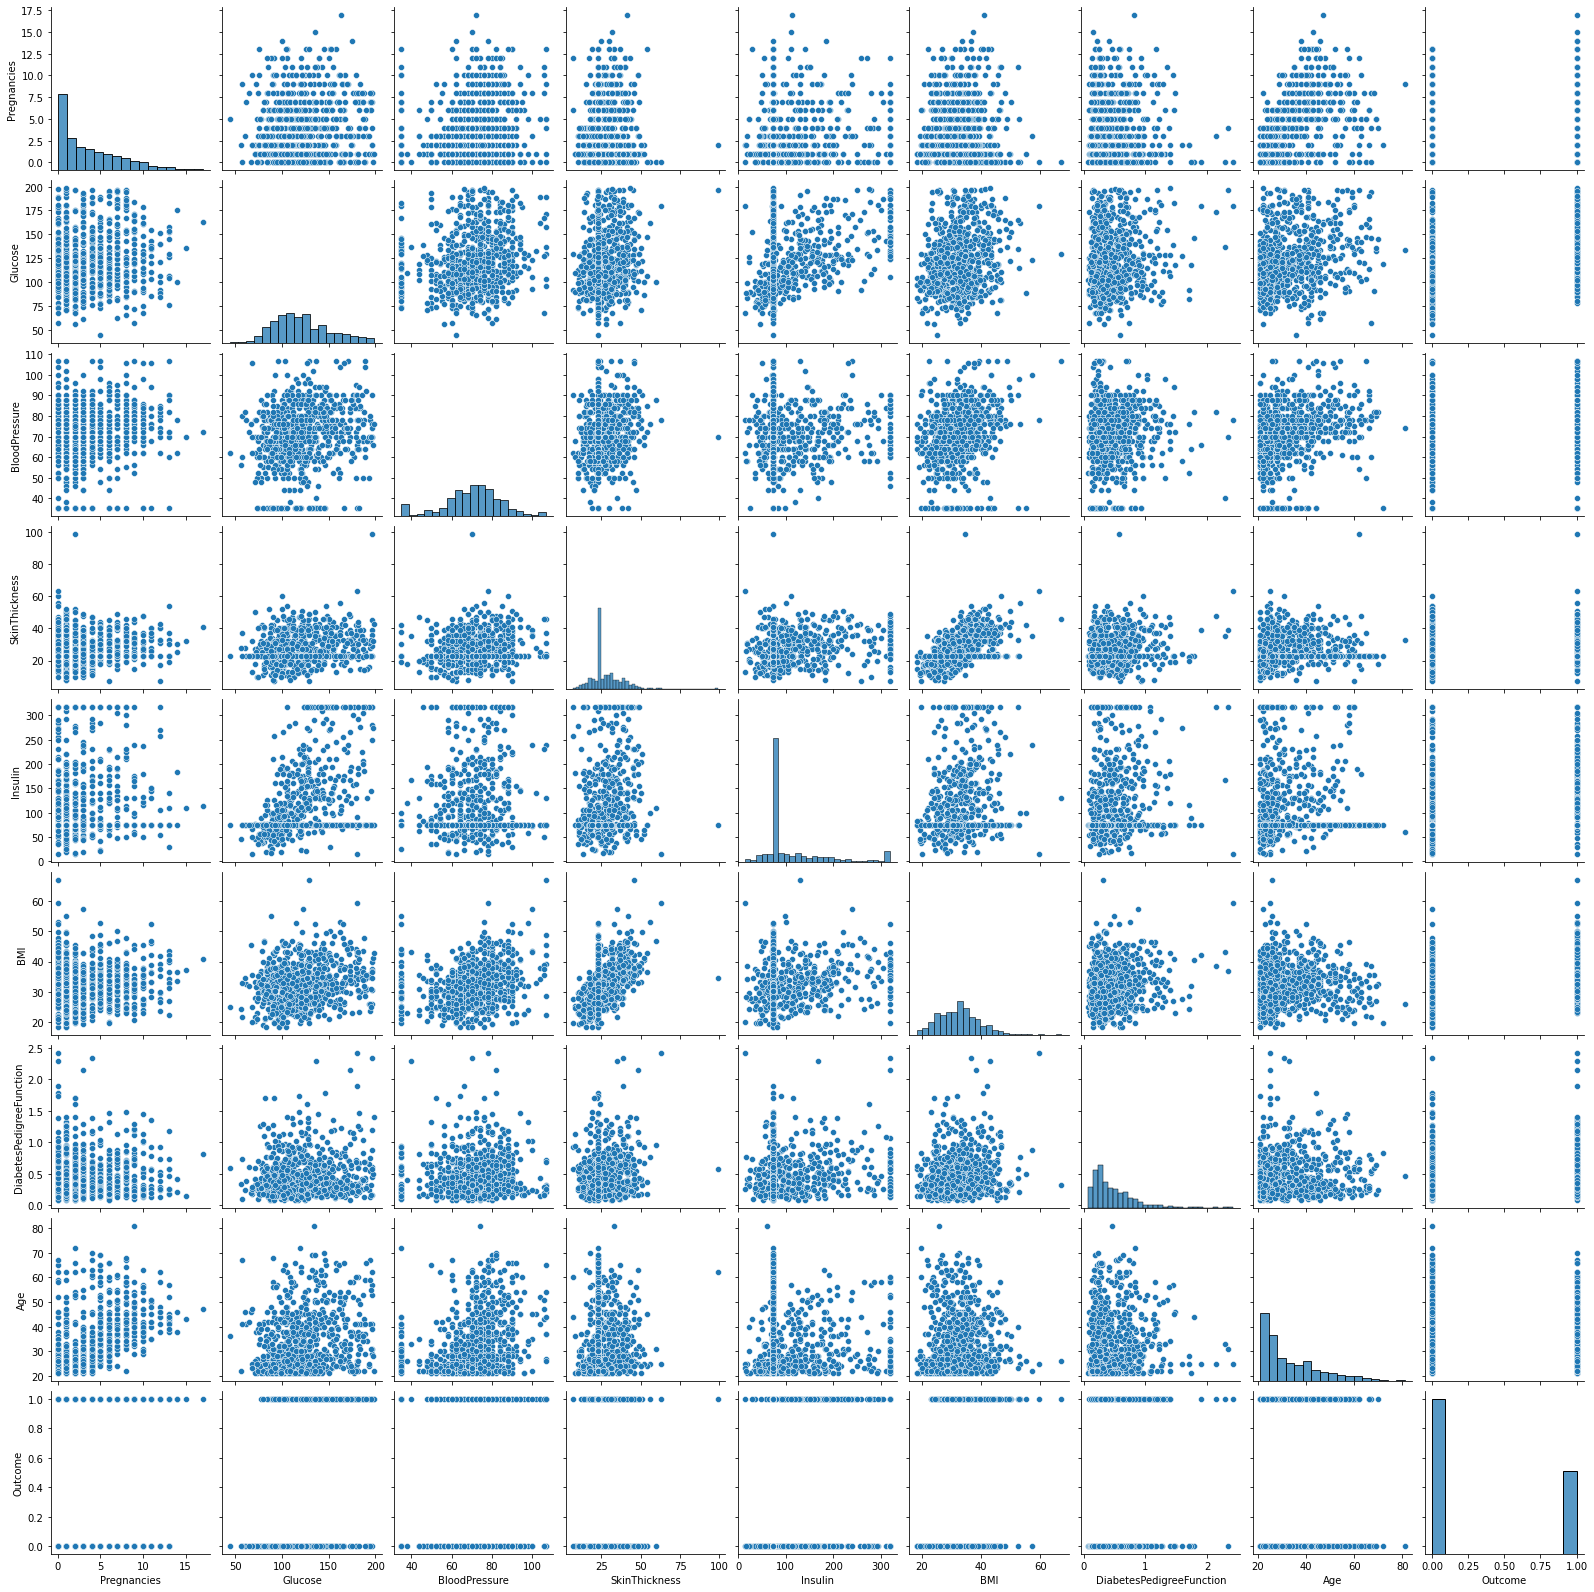

In [32]:
sns.pairplot(df)

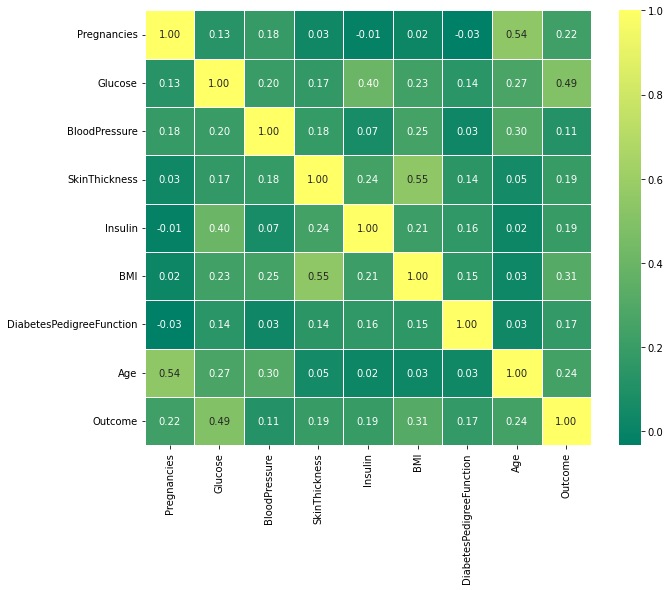

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap="summer")
plt.show()

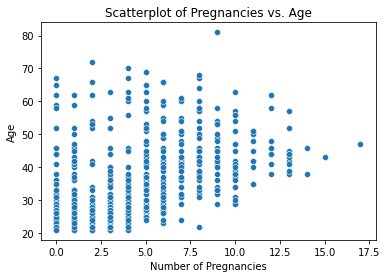

In [34]:
sns.scatterplot(x='Pregnancies', y='Age', data=df)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Age')
plt.title('Scatterplot of Pregnancies vs. Age')

# Show the plot
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


<Axes: xlabel='Outcome', ylabel='count'>

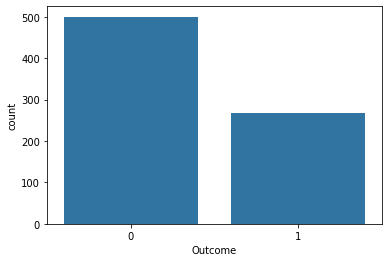

In [36]:
sns.barplot(x=df["Outcome"].value_counts().index, y=df["Outcome"].value_counts())

In [37]:
df.shape

(768, 9)

In [38]:
y=df['Outcome']

In [39]:
x=df.iloc[:,:-1]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [42]:
x_train.shape

(537, 8)

In [43]:
x_test.shape

(231, 8)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [47]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
acc=accuracy_score(y_test,y_pred)
acc

0.7402597402597403

In [48]:
x_pred=model.predict(x_train_scaled)
acc=accuracy_score(x_pred,y_train)
acc

0.7858472998137802

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200, 250,300],
    'max_depth': [5, 10, 15, 20],
    'max_features': [0.5, 0.7, 0.9, 1],
    'min_samples_leaf': [1,5,10,14,16,20]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5, verbose=1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


In [51]:
best_model

RandomForestClassifier(max_depth=15, max_features=0.9, min_samples_leaf=20,
                       n_estimators=50)

In [65]:
random=RandomForestClassifier(max_depth=15, max_features=0.9, min_samples_leaf=20,
                       n_estimators=50)

In [66]:
random.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_features=0.9, min_samples_leaf=20,
                       n_estimators=50)

In [67]:
y_pred=random.predict(x_test)

In [68]:
acc=accuracy_score(y_pred,y_test)*100

In [69]:
from sklearn.metrics import classification_report

In [70]:
cr=classification_report(y_pred,y_test)

In [71]:
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.77      0.80       166
           1       0.52      0.65      0.58        65

    accuracy                           0.73       231
   macro avg       0.68      0.71      0.69       231
weighted avg       0.75      0.73      0.74       231



In [72]:
print(acc)

73.16017316017316


In [73]:
x_pred=random.predict(x_train)

In [74]:
acc=accuracy_score(x_pred,y_train)*100
print(acc)

81.00558659217877


In [75]:
input_data=(9,170,74.0,31.0,30.500,44.0,0.403,43)
numpy_array=np.asarray(input_data)
reshaped=numpy_array.reshape(1,-1)
std_data=scaler.transform(reshaped)
print(std_data)
prediction=model.predict(std_data)
print(prediction)

if prediction==0:
    print('not diabetic')
else:
    print('diabetic')

[[ 1.52893769  1.61801257  0.24018577  0.44621116 -1.17065846  1.69354649
  -0.23147008  0.80185579]]
[1]
diabetic


C:\Users\amits\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
dtree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'max_features': [0.5, 0.7, 0.9, 1],
    'min_samples_leaf': [1, 5, 10, 14, 16, 20]
}

grid_search = RandomizedSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs = -1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [121]:
dtree = DecisionTreeClassifier(max_depth=10, max_features=0.5, min_samples_leaf=8, criterion='entropy')
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

In [122]:
acc=accuracy_score(y_pred,y_test)
print(acc)

0.7705627705627706


In [106]:
import pickle

In [123]:
pickle.dump(dtree, open("diabetes.pkl", "wb"))

C:\Users\amits\AppData\Local\Temp/ipykernel_9752/4236136313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, color="black", label= "actual_value", hist=False)
C:\Users\amits\AppData\Local\Temp/ipykernel_9752/4236136313.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

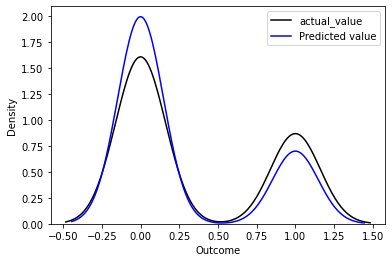

In [125]:
sns.distplot(y_test, color="black", label= "actual_value", hist=False)
sns.distplot(y_pred, color="blue", label = "Predicted value", hist = False)
plt.legend()
plt.show()